<a href="https://colab.research.google.com/github/AnisH1427/Multilingual-OCR-FYP/blob/main/Model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Import Necessary library




In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.stack((X_train,)*3,axis=-1)
X_test = np.stack((X_test,)*3,axis=-1)

y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow(X_train, y_train, batch_size=512, shuffle=True)

val_iterator = val_generator.flow(X_test, y_test, batch_size=512, shuffle=False)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(ResNet50(include_top = False, pooling='avg', weights='imagenet'))

#adding fully connected layer with output
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#set resnet layers not trainable as it is already trained
model.layers[0].trainable = False
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24641930 (94.00 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_iterator, epochs = 10, validation_data = val_iterator)

Epoch 1/10
118/118 [==============================] - 50s 344ms/step - loss: 1.4374 - accuracy: 0.5440 - val_loss: 0.7886 - val_accuracy: 0.7750
Epoch 2/10
118/118 [==============================] - 45s 382ms/step - loss: 0.9255 - accuracy: 0.7145 - val_loss: 0.6384 - val_accuracy: 0.7976
Epoch 3/10
118/118 [==============================] - 39s 329ms/step - loss: 0.7684 - accuracy: 0.7601 - val_loss: 0.5369 - val_accuracy: 0.8320
Epoch 4/10
118/118 [==============================] - 38s 322ms/step - loss: 0.6869 - accuracy: 0.7838 - val_loss: 0.4963 - val_accuracy: 0.8440
Epoch 5/10
118/118 [==============================] - 37s 315ms/step - loss: 0.6291 - accuracy: 0.8019 - val_loss: 0.4711 - val_accuracy: 0.8479
Epoch 6/10
118/118 [==============================] - 39s 330ms/step - loss: 0.5912 - accuracy: 0.8142 - val_loss: 0.4359 - val_accuracy: 0.8623
Epoch 7/10
118/118 [==============================] - 38s 326ms/step - loss: 0.5601 - accuracy: 0.8218 - val_loss: 0.4202 - val_ac

In [ ]:
def get_predictions(model, data):
    return np.array([np.argmax(prediction) for prediction in model.predict(data)])

In [ ]:
predicted = get_predictions(model, X_test)
pd.Series(predicted).value_counts()

313/313 [==============================] - 3s 11ms/step


8    3234
2    2926
1    1750
5    1187
4     899
7       4
dtype: int64

In [ ]:
pd.Series([np.argmax(i) for i in y_test]).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

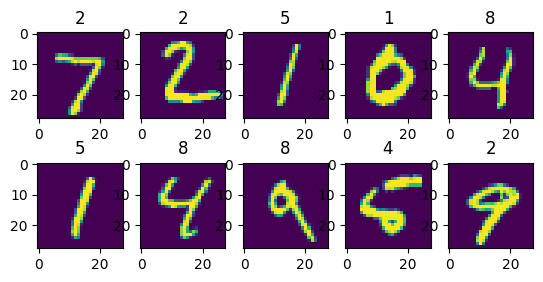

In [ ]:
import matplotlib.pyplot as plt
show_images = 10

for i in range(show_images):
    plt.subplot(show_images // 5 + 1, 5, i + 1)
    plt.title(str(predicted[i]))
    plt.imshow(X_test[i, :, :, 1].reshape(28, 28))

In [ ]:
!pwd

/content


In [ ]:
!ssh-keyscan github.com >> /root/.ssh/known_hosts

/bin/bash: line 1: /root/.ssh/known_hosts: No such file or directory


In [ ]:
!ssh -T git@github.com

Host key verification failed.


In [ ]:
!pwd

/content


In [ ]:
!git clone git@github.com:AnisH1427/Multilingual-OCR-FYP.git

Cloning into 'Multilingual-OCR-FYP'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [ ]:
cd  Multilingual-OCR-FYP

[Errno 2] No such file or directory: 'Multilingual-OCR-FYP'
/content


In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git
